# KMeans Clustering voor Customer Data

Clusteren is het proces van het groeperen van vergelijkbare objecten in een dataset op basis van hun eigenschappen. Het doel is om verborgen patronen of structuren in de data te ontdekken zonder vooraf gelabelde informatie. Clusteren wordt gebruikt in diverse domeinen en toepassingen, zoals patroonherkenning, marketing en sociale netwerkanalyse. Verschillende algoritmen, zoals k-means, hiërarchische clustering en DBSCAN, worden gebruikt om clusteranalyse uit te voeren. Het resultaat is een set van clusters waarbinnen objecten vergelijkbaar zijn en tussen clusters verschillen.

## Supervised vs unsupervised learning


Het verschil tussen supervised learning en unsupervised learning:

### Supervised Learning:

- Gebruikt gelabelde data, waarbij de gewenste output of het doelvariabele bekend is.

- Het doel is om een model te trainen dat voorspellingen kan doen of classificaties kan maken op nieuwe, ongeziene data.

- Het model leert van de inputfeatures in combinatie met de bijbehorende labels om patronen en relaties te begrijpen.

- Geschikt voor taken zoals classificatie (toewijzen van objecten aan vooraf gedefinieerde categorieën) en regressie (voorspellen van continue waarden).

### Unsupervised Learning:

- Gebruikt ongelabelde data, waarbij er geen expliciete doelvariabele of labels beschikbaar zijn.

- Het doel is om patronen, structuren of groeperingen in de data te ontdekken zonder begeleiding van labels.

- Het model leert inherent verborgen patronen of structuren in de data te identificeren.
Geschikt voor taken zoals clustering (groeperen van vergelijkbare objecten), dimensionaliteitsreductie (verminderen van de complexiteit van de data) en anomaliedetectie (identificeren van ongebruikelijke patronen of afwijkingen).

## Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

## Dataset informatie

In [2]:
df = pd.read_csv('CSV/Mall_Customers.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'CSV/Mall_Customers.csv'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2D Clustering op Annual Income en Spending Score

### K value

K-means clustering vereist dat je de waarde van K, het aantal clusters, bepaalt. Er zijn verschillende methoden om K te kiezen, zoals het gebruik van domeinkennis, de Elbow Method (elleboogmethode), de Silhouette Score en het analyseren van het dendrogram bij hiërarchische clustering.

Elbow Method: De Elbow Method is een veelgebruikte heuristische methode om K te bepalen. Hierbij worden verschillende waarden van K getest en wordt de som van de kwadratische afstanden binnen clusters (inertie) geplot. De "elleboog" in de plot wordt geïdentificeerd, waar de toevoeging van een extra cluster niet veel verbetering meer oplevert. Dit punt wordt vaak beschouwd als een geschikte waarde voor K.

In [29]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

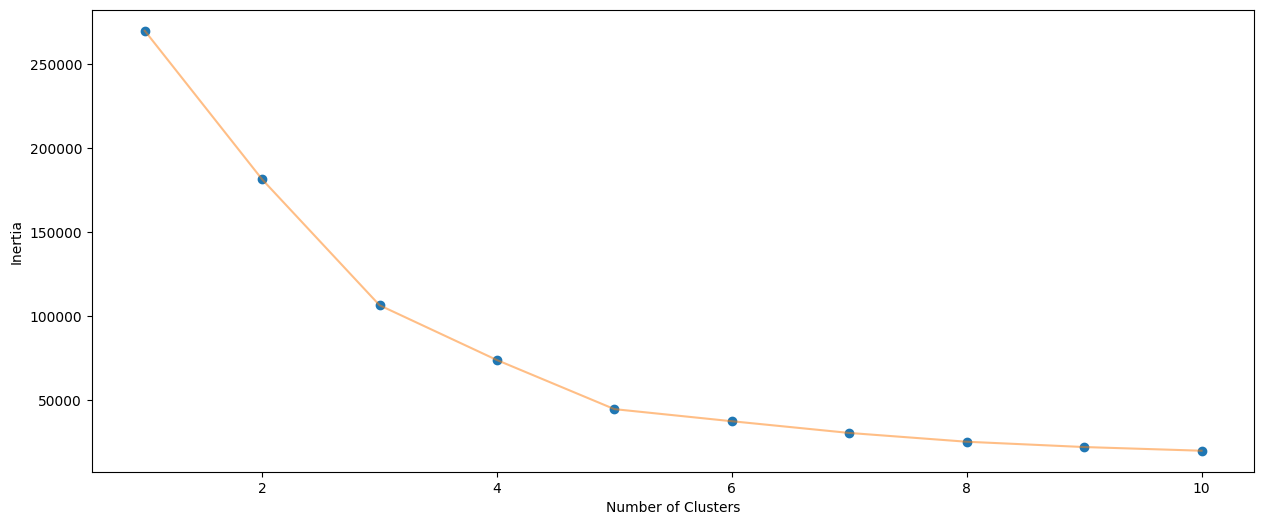

In [30]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

De elbow begint op 5 dus we gebruiken 5 clusters

In [31]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [32]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

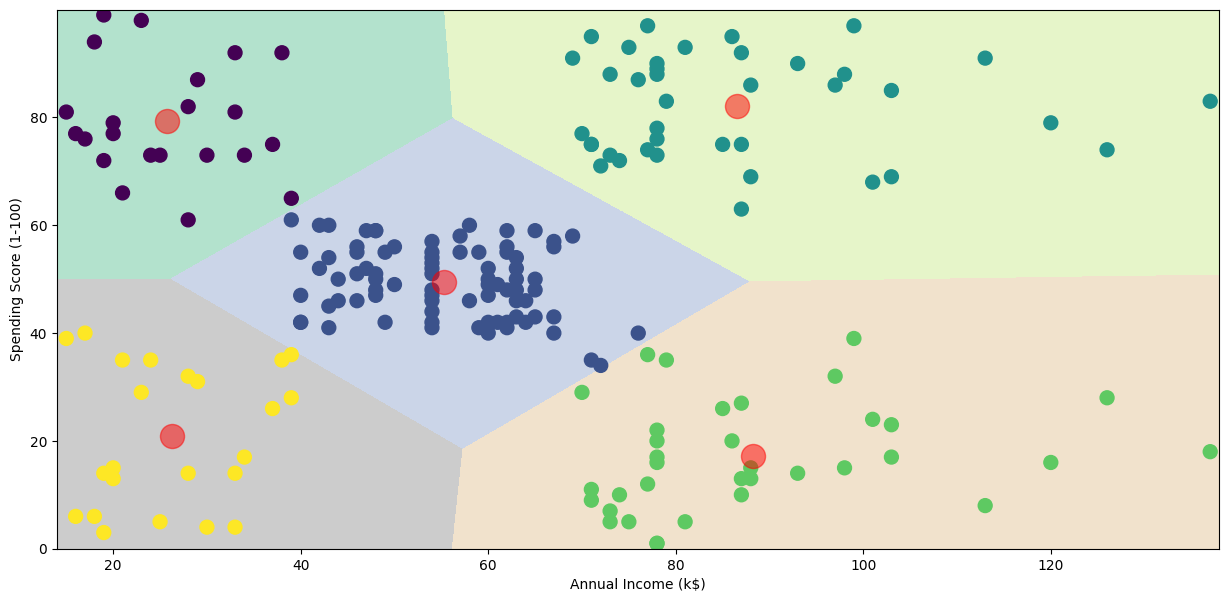

In [33]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

Bij het K-means clustering-algoritme worden de datapunten toegewezen aan clusters op basis van de afstand tot de centroids (de grote rode stippen). In het begin worden de centroids willekeurig geplaatst, en vervolgens wordt het algoritme iteratief uitgevoerd om de centroids te optimaliseren. Dit gebeurt door de punten binnen elke cluster te evalueren en de centroid te herberekenen als het gemiddelde van die punten.

Naarmate het algoritme vordert, verschuiven de centroids naar de meest representatieve posities binnen hun respectievelijke clusters, zodat de som van de kwadratische afstanden tussen de datapunten en hun toegewezen centroids minimaal wordt.

In [34]:
y_kmeans = algorithm.fit_predict(X2)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head(30).sort_values(['cluster'])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
29,30,Female,23,29,87,0
15,16,Male,22,20,79,0
21,22,Male,25,24,73,0
13,14,Female,24,20,77,0
11,12,Female,35,19,99,0
23,24,Male,31,25,73,0
17,18,Male,20,21,66,0
9,10,Female,30,19,72,0
25,26,Male,29,28,82,0
5,6,Female,22,17,76,0
